In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Income_practice.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income($)')

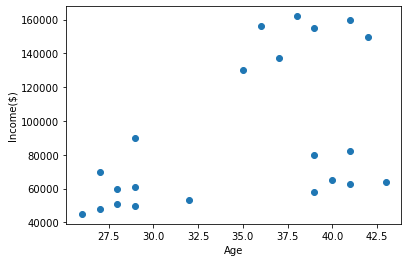

In [4]:
plt.scatter(df.Age , df['Income($)'])
plt.xlabel("Age")
plt.ylabel("Income($)")

In [7]:
# Importing machine libraries
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(df[['Age' , 'Income($)']])

In [8]:
y_pred

array([2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1])

In [9]:
df['Cluster'] = y_pred
df.head()

,Name,Age,Income($),Cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0


In [10]:
km.cluster_centers_

array([[3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04],
       [3.40000000e+01, 8.05000000e+04]])

In [13]:
df1 = df[df.Cluster == 0]
df2 = df[df.Cluster == 1]
df3 = df[df.Cluster == 2]

Text(0, 0.5, 'Income')

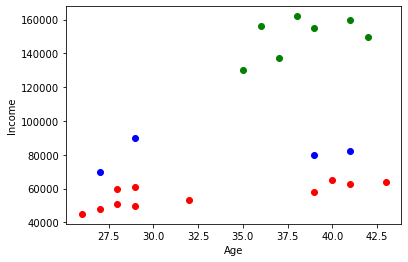

In [16]:
plt.scatter(df1.Age , df1['Income($)'] , color = 'green')
plt.scatter(df2.Age , df2['Income($)'] , color = 'red')
plt.scatter(df3.Age , df3['Income($)'] , color = 'blue')
plt.xlabel("Age")
plt.ylabel("Income")

***Here we found that it is not working well may be because of not in same scale***



In [22]:
# Scaling features at same scale
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

# Same for Age
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df.head()

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


In [24]:
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(df[['Age' , 'Income($)']])
df['Cluster'] = y_pred
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

In [25]:
df1 = df[df.Cluster == 0]
df2 = df[df.Cluster == 1]
df3 = df[df.Cluster == 2]

Text(0, 0.5, 'Income')

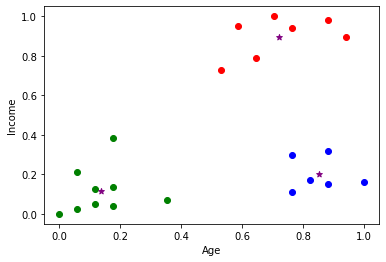

In [30]:
plt.scatter(df1.Age , df1['Income($)'] , color = 'green')
plt.scatter(df2.Age , df2['Income($)'] , color = 'red')
plt.scatter(df3.Age , df3['Income($)'] , color = 'blue')
plt.scatter(km.cluster_centers_[: , 0] , km.cluster_centers_[:,1],color = 'purple' , marker="*" , label = "Centroid")
plt.xlabel("Age")
plt.ylabel("Income")

***Now it's working well***